In [12]:

import numpy as np # This library is used for array operations
import pandas as pd # This library is used to edit the dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf 
import os
import pickle 

# classification: supervised machine Learning process in which the outputs are already present the dataset


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
df = pd.read_csv('onlinefraud.csv')

df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


* The dataset consists of 6,362,620 observations.

In [19]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1952816,178,CASH_IN,49812.39,C239442192,579.00,50391.39,C1065414661,0.00,0.00,0
2542633,206,CASH_OUT,171468.53,C1477361688,4576.24,0.00,C1197106965,9087235.66,9258704.19,0
5726311,399,CASH_OUT,30227.35,C396271718,52473.00,22245.65,C1569159288,468538.00,498765.35,0
857970,41,CASH_OUT,68232.64,C728702717,0.00,0.00,C2023837618,305210.34,373442.98,0
3197782,249,PAYMENT,3250.22,C1452228203,0.00,0.00,M1158883242,0.00,0.00,0


In [20]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True
    )
)

    columns           min value    max value
--  --------------  -----------  -----------
 0  amount                    0  9.24455e+07
 1  oldbalanceOrg             0  5.9585e+07
 2  newbalanceOrig            0  4.9585e+07
 3  oldbalanceDest            0  3.56016e+08
 4  isFraud                   0  1


In [21]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

df['type'] = df['type'].astype('category')

In [22]:
df['step'].value_counts() # how many hours the transaction take to complete

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

C:\Users\thanay\AppData\Local\Temp\ipykernel_14276\1891498494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='husl')
C:\Users\thanay\AppData\Local\Temp\ipykernel_14276\1891498494.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


Text(0, 0.5, 'Number of transactions')

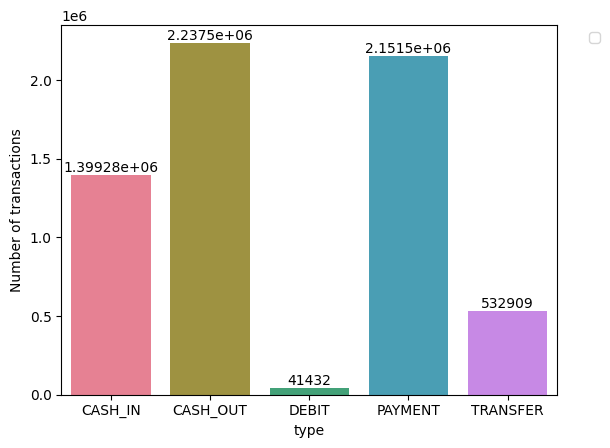

In [23]:
ax = sns.countplot(x='type', data=df, palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

The distribution of transaction amounts is right skewed.This indicates that most values are clustered around the left tail of the distribution, with the longer right tail i.e. (mode < median < mean)

In [24]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

There are 6353307 initial customers, and every step has at least 1 occurrence. Step indicates the number of hours.

Text(0.5, 1.0, 'Distribution of oldbalanceOrg')

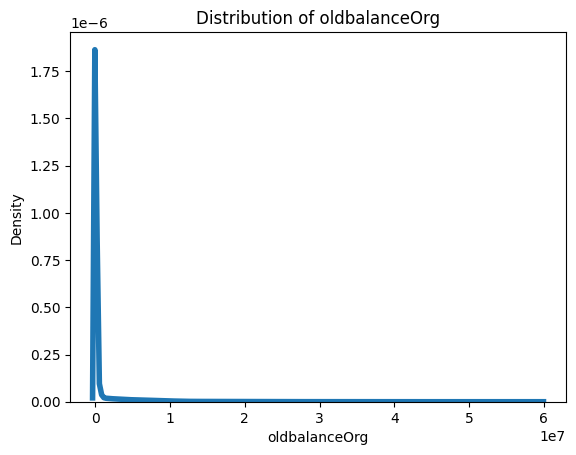

In [25]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of oldbalanceOrg')

The distribution of pre-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of newbalanceOrig')

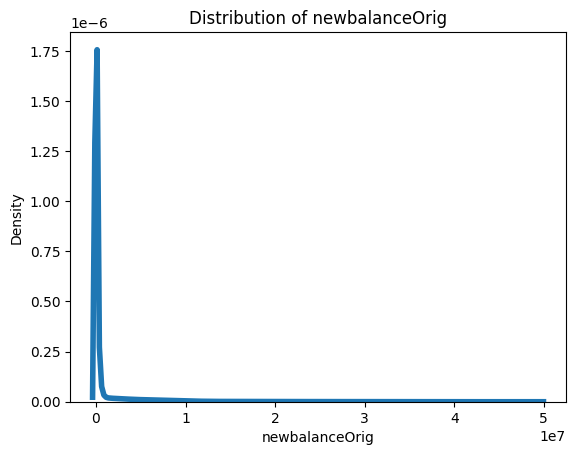

In [26]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of newbalanceOrig')

The distribution of post-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of oldbalanceDest')

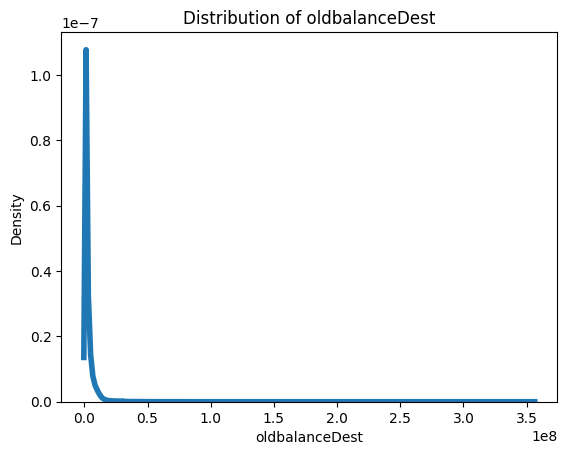

In [27]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of oldbalanceDest')

The distribution of pre-transaction balances of the recipient is right skewed.

Text(0.5, 1.0, 'Distribution of newbalanceDest')

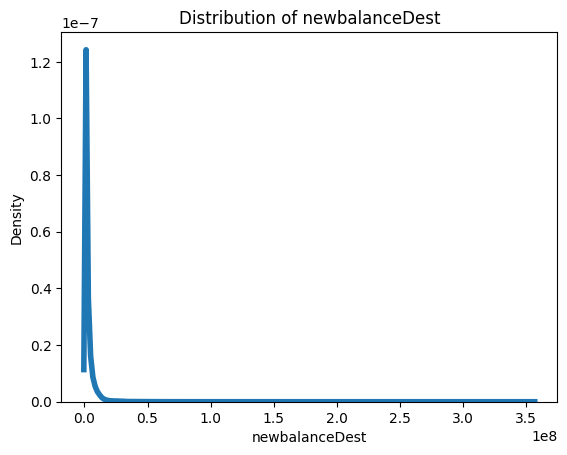

In [28]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of newbalanceDest')

The distribution of post-transaction balances of the recipient is right skewed.

C:\Users\thanay\AppData\Local\Temp\ipykernel_14276\3521969085.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


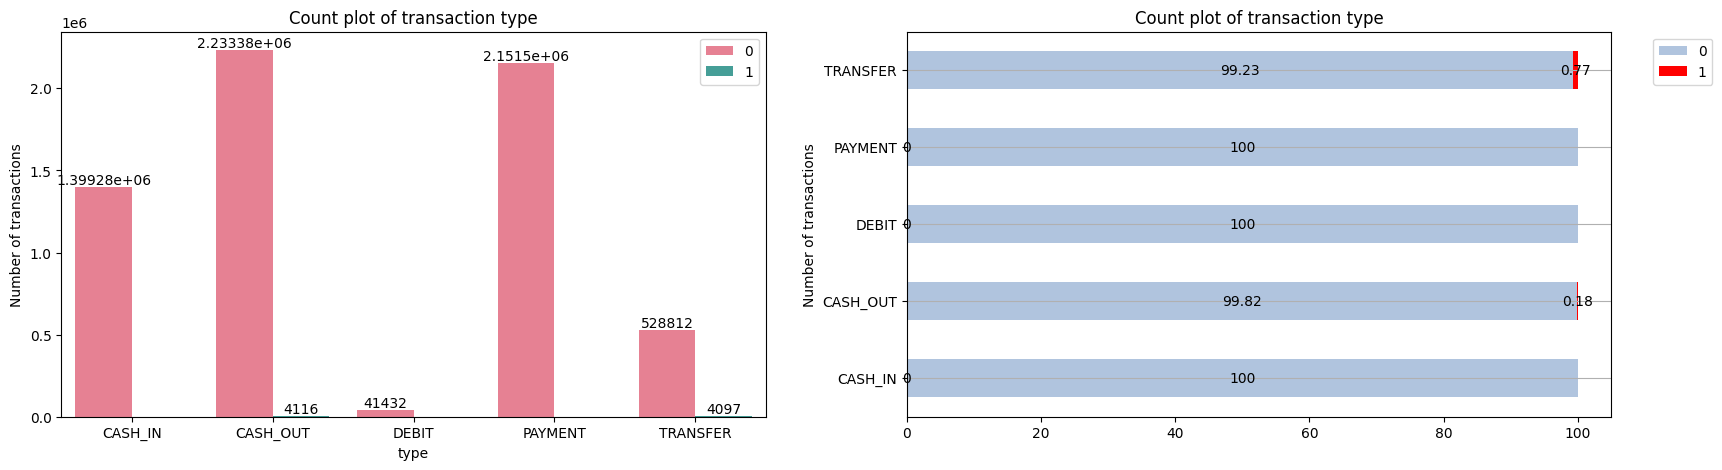

In [29]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='husl', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'red'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Fraudulent transactions only occur in cashout types and transfer types.

Text(0, 0.5, 'Number of transactions')

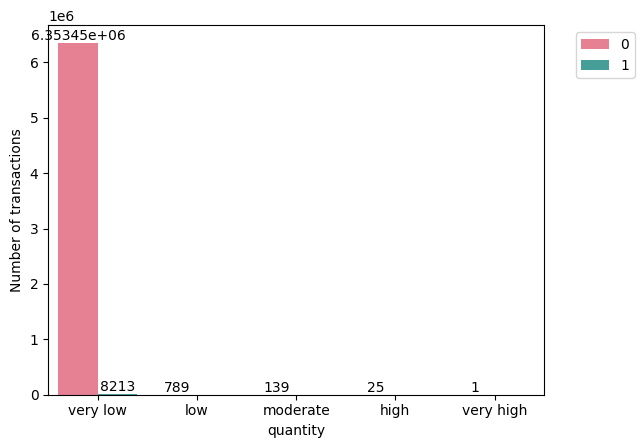

In [30]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

All fraudulent transactions fall into the category of very low amounts we did this by dividing the amount values into very low, low, moderate, high and very high.This suggests that in most cases, small transactions are more prone to fraudulent transactions.

Text(0.5, 0, 'pre-transaction balance amount')

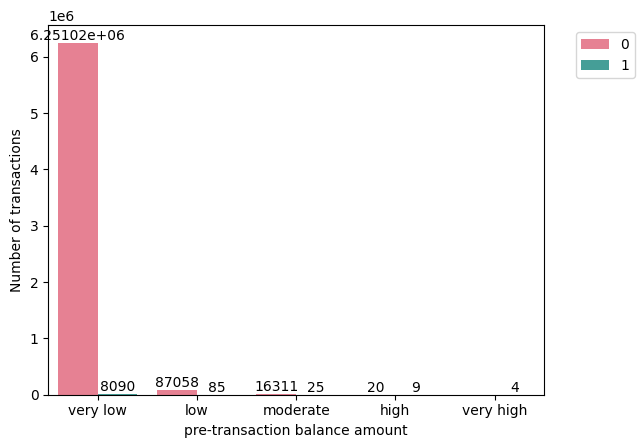

In [31]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('pre-transaction balance amount')

Customers with very low pre-transaction balances has the highest number of fraudulent transactions. This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

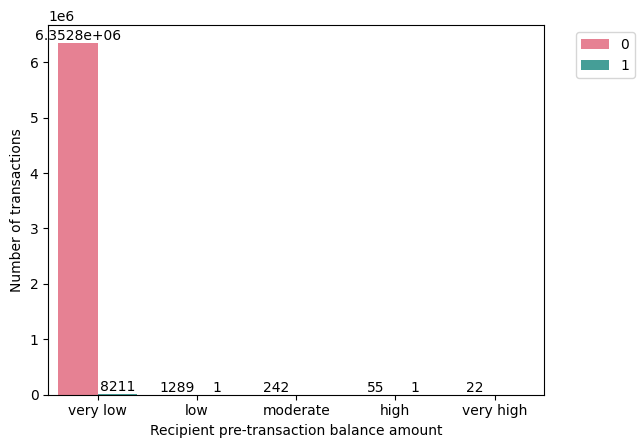

In [32]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Same goes with the Reciepients just like customers the most fraudulent transactions lie on very low pre-transaction amount.

By all the graphs and correlation we can say that :

oldbalanceOrg and newbalanceOrig has strong positive relationship.
oldbalanceDest and newbalanceDest has strong positive relationship.
oldbalanceOrg and amount has weak positive relationship.
newbalanceOrig and amount has moderate positive relationship.

In [33]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [36]:
from sklearn.model_selection import StratifiedKFold # divide equally into K parts with no class bias
from sklearn.preprocessing import StandardScaler # 

# Classification of fraud transactions:



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# MLP, SLP, Naive_Bayes, SVM, ADABoost

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)



X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [20]:
X_test.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest
5,-1.703608,-1.115243,-0.284250,-0.269913,-0.322309
10,-1.703608,0.259138,-0.281230,-0.287012,-0.319134
22,-1.703608,0.259138,-0.295408,-0.287928,-0.319285
24,-1.703608,1.633518,0.217912,-0.284806,-0.320474
25,-1.703608,-1.115243,-0.287153,-0.288404,-0.322309


In [37]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

We have taken 4 models to predict the value i.e. Random Forest Classifier, Logistic Regression, Decision Tree Classifier and Gradient Boosting Classifier.

In [38]:
classifiers = { 'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed),
                'Decision Tree Classifier': DecisionTreeClassifier(class_weight='balanced',random_state=seed),
                'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=seed),
              }

In [39]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.985 (0.003)
Mean precision score: 0.975 (0.006)


Logistic Regression:
Mean accuracy score: 0.848 (0.007)
Mean precision score: 0.843 (0.008)


Decision Tree Classifier:
Mean accuracy score: 0.976 (0.003)
Mean precision score: 0.974 (0.005)


Gradient Boosting Classifier:
Mean accuracy score: 0.978 (0.002)
Mean precision score: 0.963 (0.004)




From the above result we can compare the Mean accuracy score of all 4 models. the best accuracy is provided by Random Forest Classifier i.e. 98.5% , Decision Tree has accuracy score of 97.6%, Gradient Boosting Classifier has 97.8% and logistic regression has 84.8%.

**Conclusion**

Random Forest obtains the highest score of all models used.
The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments, as the accuracy is 98.5%. This means it has a good separability measure.

In [40]:
results = {}

# linear Regression = 
# y = mx + b # intercept

# logistic = sigmoid function

# decisionTree = information gain, entropy

# RandomForest = decisionTree * n

# gradient descent


for name, clf in classifiers.items():
    print(f'Training {name}...')

    if(name == 'Random Forest Classifier'):
        final_model = clf
    
    clf.fit(X_train, y_train) # training is the process of adjusting weigths or co efficients which help us to better predict new values
    y_pred = clf.predict(X_test)
    
    # Store the results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f'{name} Results:')
    print(f'Accuracy: {results[name]["accuracy"]}')
    print('Classification Report:')
    print(results[name]['classification_report'])
    print('Confusion Matrix:')
    print(results[name]['confusion_matrix'])
    print('-' * 60)

Training Random Forest Classifier...
Random Forest Classifier Results:
Accuracy: 0.9750653032870107
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.05      1.00      0.09      1643

    accuracy                           0.98   1272524
   macro avg       0.52      0.99      0.54   1272524
weighted avg       1.00      0.98      0.99   1272524

Confusion Matrix:
[[1239155   31726]
 [      4    1639]]
------------------------------------------------------------
Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.8338161009144032
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91   1270881
           1       0.01      0.85      0.01      1643

    accuracy                           0.83   1272524
   macro avg       0.50      0.84      0.46   1272524
weighted avg       1.00      0.83      0.91   1

In [41]:
# Assuming you have already trained and saved the model
pickle.dump(final_model, open('model.pkl','wb'))